# Time Series Analysis and Forecasting: An Intro Crash Course 


This crash course introduces the fundamental concepts, definitions, and models used in time series analysis. It is designed to get you up and running with time series models as fast as possible. I go over the basics of stationarity, time series decomposition, testing for noise, analyzing data with ACF/PACF plots, fitting an ARMA model, grid search, and forecast evaluation. I provide a Python tutorial on applying a powerful method called SARIMA which can capture trend and seasonality of a time series to predict it.

There are many other topics in time series analysis such as spectral analysis, state-space models, etc. that I do not review here (I may make other Notebooks on those topics in the future). Additionally, I do not go into the detail of the mathematical properties of time series models. You can spend an entire semester studying the very interesting statistical concepts such as stationarity, invertibility, back-shift operators, variance analysis, maximum likelihood estimation, hypothesis testing, confidence and prediction interval estimation, etc. But you can still be an effective data scientist without knowing all that.

## 1. Introduction

A realization of a stochastic process is a sequence of random variables that have specified correlation or other distributional relationship between them and are indexed by a set of numbers, usually viewed as points in time. A time series is the realization of a stochastic process. As such, in time series analysis we assume that a given series was produced by some stochastic process and it is our job to figure out which process this was and its parameters.

There are many, many times of stochastic processes such as random walks, Bernoulli process, Markov process, Gaussian process, etc. For time series analysis we are mostly concerned if our series comes from an autoregressive (AR), moving average (MA) processes, or autoregressive moving average (ARMA) process. If we conclude that our data comes from an ARMA process we then apply an ARMA model to analyze and forecast that series. 

Time series models based of off ARMA can get fairly complex by incorporating integrated (I) models, fractionally integrated (FI) models, vector (V) models, seasonal (S) models, exogenous (X) data, conditional heteroskedasticity (CH), nonlinearity (N), etc. Methods for time series analysis may be divided into two classes: frequency-domain methods and time-domain methods. The former includes spectral analysis and wavelet analysis; the latter include autocorrelation and cross-correlation analysis. Lastly, time series analysis techniques may be divided into dealing with univariate or multivariate data.



---
**NOTE: Linear vs Nonlinear Models**

Let's assume you have a stationary time series. Then if the dependence level of a series on previous data points is linear (which may not always be easy to test for) then ARMA models will work best almost every time for forecasting. If the dependence is nonlinear or your goal is more about capturing trend/seasonal patterns (such as in harmonic regression or exponential smoothing models) then nonlinear machine learning models can be applicable. For instance, most neural networks applied to time series forecasting are considered as nonlinear autoregressive (NAR) models and they work great on chaotic or nonlinear data. In any case, it is always a good idea to have an ARMA model as your main benchmark when doing forecast studies!

**NOTE: Time Series Analysis vs Regression Analysis**

Time series analysis and regression analysis share many models and ideas but they are theoretically different! Time series analysis first deals with time indexed stationary data and accounts for the autocorrelation between time events. In regression we assume there is no autocorrelation, we also assume in regression the data is homoscedastic and does not exhibit multicollinearity.

---

## 1.1 Advantages and Disadvantages of ARMA Models vs Machine Learning

These are my personal thoughts on time series models vs machine learning models for forecasting. You won't really read about strengths and weaknesses of models in most textbooks, this is something you pick up with experience by using them. For machine learning, there are hundreds of methods each having their own pros and cons, here I focus primarily on nonlinear regression models such as support vector regression and recurrent neural networks.

**Advantages of ARMA Models**
1. Simple to implement and fast to run.
2. Easier to handle multivariate data.
3. Best for linear and stationary data.
4. Excellent for single step or short multi-step forecasting.
5. Has well known analytical properties.

**Disadvantages of ARMA Models**
1. Performs bad if the series has complex patterns (multiple seasonality, drift, regime changes, etc.).
2. Performs bad if the series exhibits nonlinear dependencies.
3. It is weak on big datasets; works best with <1000 data points.
4. No online learning, model must be retrained from scratch with new data.
5. Requires preconditions such as stationarity, constant error variance, etc. 

**Advantages of Machine Learning Models**
1. Typically no preconditions. 
2. Can handle linear and nonlinear data.
3. Can handle nonstationary data.
4. Work well with big data sets (in fact ML models need lot of data which could be a disadvantage sometimes).
5. Algorithms can be planned to avoid overfitting.

**Disadvantages of Machine Learning Models**
1. May not always have well defined analytical properties or solutions.
2. Most methods are black boxes, very difficult to interpret parameters.
3. Hard to train sometimes, models can get stuck in bad local minimums and give bad results.
4. Typically require extensive feature engineering to work well.
5. Require hyperparameter tuning.


## 2. Time Series Decomposition

In text books, the main approach to time series analysis is called the **Box–Jenkins** method which has three main steps: model selection, parameter estimation, and model checking. Below I break down this approach in an easier way to understand:

1. Get a series and check if it is stationary.
2. If it isn't, then apply time series decomposition until it is.
3. With the stationary series check if it is noise.
4. If it is not noise then select and fit an ARMA model to it.
5. Evaluate the ARMA model by subtracting it from the stationary series to get a residual series.
6. If the residual series is white noise, we're done. If not then go back and repeat step 4.

---
**Note: Definition of a Residual Series**

The term "residual series" is used very often in time series analysis and can be confusing. It simply means any series remaining after some operation has been performed on an initial series. If I take a series and subtract each value in it by 10, the remianing series is called a residual series.

---

### 2.1 Stationary Process

Before picking a time series model for forecasting we check if it is stationary and if not we make it stationary by way of time series decomposition described below. All theory in time series analysis is based on the assumptions that our data come from a stationary stochastic process whose unconditional joint probability distribution does not change when shifted in time. In other words, the mean and variance of a time series **must** be constant and not change over time. This assumption is very important!

Quick tests for stationarity:
* Visual inspection of plotted data; if there is no trend,  seasonality, or major shifts present then it maybe stationary.
* Look at the simple moving average and rolling variance of the series; if they are flat then the series is stationary.
* Look at the autocorrelation plot of the series, if it is zero or decays fast to zero at higher lags it is stationary.

These quick tests are not always enough to indicate stationarity. Below are some more complex but robust tests:
* Dickey-Fuller (DF) Test
* Augmented Dickey-Fuller (ADF) Test
* Phillips-Perron (PP) Test
* Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test

#### 2.1.1 Augmented Dickey-Fuller Test

The Augmented Dickey-Fuller test, the most popular for examining stationarity, is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. It uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

* Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
* Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 1% or 5%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary). 

* p-value > threshold: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= threshold: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


### 2.2 Time Series Patterns

A fundamnetal aspect in time series analysis is the concept of decomposing a series into its main patterns which are **trend** (T), **seasonality** (S), **cycles** (C), and the **irregular** (I) pattern. The main purpose of this is to create a residual series (the irregular pattern) that is stationary on which we then apply an ARMA model on for forecasting. There are two types of decomposition models:

* **Additive Models**: $y_t=S_t+T_t+C_t+I_t$
* **Multiplicative Models**: $y_t=S_t \times T_t \times C_t \times I_t$

The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate. With economic time series, multiplicative models are common. Standard practice when dealing with multiplicative data is to make them additive by applying a log transform: $ \log(y_t)= \log(S_t) + \log(T_t) + \log(C_t) + \log(I_t)$.

<img src="images/decomposition.PNG" width="800">

*Note: other kind of patterns exist (such as aperiodic patterns, nonlinear patterns, drift, etc), but in time series analysis we are concerned mainly with analyzing the ones described above.*


### 2.3 Steps in Decomposition

*  The first step is to estimate and remove the trend.  Several approaches could be used for this:
    * **Aggregation**: taking the average for a time period like monthly/weekly averages.
    * **Smoothing**: taking rolling averages.
    * **Polynomial Fitting**: fit a regression model.
    * **Differencing**: taking the difference with a particular time lag (most popular method for modeling trend).
    
In removing the trend for an additive decomposition, this is done by subtracting the trend estimates from the series.  For a multiplicative decomposition, this is done by dividing the series by the trend values.

* Next, seasonal factors are estimated using the de-trended series:
    * **Aggregation**:  taking the average of the de-trended values for a specific season.  
    * **Harmonic Regression**: fitting the seasonality with periodic sinusoidal terms.
    * **Differencing**: taking the difference at seasonal time lag (most popular method for modeling seasonality).

The seasonal effects are usually adjusted so that they average to 0 for an additive decomposition or they average to 1 for a multiplicative decomposition. In most cases, cycles are eliminated when the trend and seasonlity is estimated, therefore from now on I won't mention cycles in our modeling.

* The last step is to determine the irregular component. For the additive model this is done by: $I_t=y_t-T_t-S_t$. 

Once we have this irregular component we double check if it is stationary. If it is not stationary we repeat the steps above until it is. When it is stationary we then check if the irregular component is noise by looking at ACF/PACF plots or by applying what is called the **Ljung–Box test**. If it is not noise, we move foward to fitting an ARMA model to it. 

<img src="images/deco.png" width="600">


## 3. Autoregressive Moving Average (ARMA) Model

ARMA models are the most commonly used in times series analysis and forecasting. For linear stationary data they are hard to beat in terms of prediction accuracy.

**Autoregressive model**

The notation AR(p) refers to the autoregressive model of order p:

$X_t = \mu  + \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i}  $

where $\varphi_1, \ldots, \varphi_p$ are parameters, $\mu$ is the expectation of $X_t$, and the random variable $\varepsilon_t$ is white noise. 

**Moving Average model**

The notation MA(q) refers to the moving average model of order q:

$ X_t = \mu + \varepsilon_t + \sum_{i=1}^q \theta_i \varepsilon_{t-i}$

where the $\theta_1, ..., \theta_q$ are the parameters of the model, $\mu$ is the expectation of $X_t$, and the $\varepsilon_t, \varepsilon_{t-1},...$ are again, white noise error terms. 

The error terms in both models $\varepsilon_t$ are generally assumed to be independent identically distributed (i.i.d.) random variables sampled from a normal distribution with zero mean and some variance.

**ARMA model**

The notation ARMA(p,q) refers to the model with p autoregressive terms and q moving-average terms. This model contains the AR(p) and MA(q) models:

$ X_t = \mu + \varepsilon_t +  \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \theta_i \varepsilon_{t-i} $

When p and q are chosen, the parameters of ARMA, $\theta_i$ and $\varphi_i$ are estimated by maximum likelihood estimation or non-linear least-squares estimation.



## 4. Model Selection

Once we have our stationary residual series (irregular component) and proved it's not noise we move foward to estimating the p and q parameters of the ARMA model. This is known as model selection and there are two main ways. The first is to analyze the autocorrelation plots and pick p and q based on significance levels. The second most common way is to apply grid search using the Akaike information criterion.

### 4.1 Autocorrelation and Partial Autocorrelation Functions

The autocorrelation (ACF), also called a correlogram, of a time series is the Pearson correlation between values of the series at different times, as a function of the time lags:

${\displaystyle \gamma(k)={\frac {\operatorname{E} [(Y_{t}-\mu )(Y_{t-k }-\mu )]^2}{ \operatorname{E} [(Y_{t}-\mu )^2] }}} $

The ACF is just the normalized autocovariance of the series. ACF at lag 0 is always equal to 1. The partial autocorrelation (PACF) at lag k is the autocorrelation between $Y_t$ and $Y_{t-k}$ that is not accounted for by lags 1 through $k-1$. There are algorithms, not discussed here, for computing the PACF based on the sample autocorrelations. ACF plots help us determine the number of MA(q) parameters and PACF plots help us find the number of AR(p) parameters in an ARMA model (reviewed in section 5.1). 

A significance level is the probability of rejecting the null hypothesis given that it is true. In the case of ACF/PACF plots we use them to test the null hypothesis that the time series is white noise. To do this we calculate 95% confidence intervals (assuming normal distribution) with the following formula $ \pm1.96/\sqrt(N)$ where N is the number of points in our time series we're analyzing. In both the ACF and PACF plots, if the values are above the 95% confidence intervals we assume those lags have significance and thus the series is not noise. If at all lags the values are below the 95% confidence intervals then we assume the series is noise.

### 4.2 Grid Search and AIC

Suppose that we have an ARMA model fitted to a time series. Let k be the number of estimated parameters in the model $k = p+q$. Let L be the maximum value of the likelihood function for the model (L can also be RMSE fit of the model to the data which is related to the likelihood). Then the Akaike information criterion (AIC) value of the model is the following:

$AIC = 2 k - 2 \ln ⁡ ( L  ) $

The objective is to minimize the AIC values for a good model. The lower the value for a range of models being investigated, the better the model will suit the data. In grid search for ARMA(p,q) we create a permutation for all values of p and q from 0 to some max value we pick for each. Then we take all our permutated models ARMA(0,1), ARMA(1,0), ARMA(1,1), ARMA(0,2), etc, we fit them to our training data and calculate the AIC for each model. The model with the lowest AIC is the one we pick to use to forecast the data.


## 5. SARIMA Model

When trend and seasonality is present in our time series, instead of decomposing it manually a very popular method is to use the seasonal autoregressive integrated moving average (SARIMA) model which is a generalization of an ARMA model. SARIMA models are denoted SARIMA(p,d,q)(P,D,Q)[S], where S refers to the number of periods in each season, d is the degree of differencing (the number of times the data have had past values subtracted), and the uppercase P, D, and Q refer to the autoregressive, differencing, and moving average terms for the seasonal part of the ARIMA model.

The SARIMA model is a bit complex to write out directly so a backshift operator is needed to describe it. For example SARIMA(1,1,1)(1,1,1)[4] is written as:

<img src="images/back.png" width="600">

The backward shift operator $B$ is a useful notational device when working with time series lags:

$By_t=y_{t-1}$

Some references use $L$ for "lag" instead of $B$ for "backshift". The $B$ operating on $y_t$, has the effect of shifting the data back one period. Two applications of BB to ytyt shifts the data back two periods:

$B(By_t)=B^2 y_t=y_{t-2}$

For monthly data, if we wish to consider "the same month last year", the notation is $B^{12} y_t = y_{t-12}$. The backward shift operator is convenient for describing the process of differencing. A first difference can be written as

$y_t - y_{t-1} = y_t - By_t =(1-B)y_t$

### 5.1 Rules for SARIMA model selection from ACF/PACF plots

These are all rule of thumbs, not an exact science for picking the number of each parameters in SARIMA(p,d,q)(P,D,Q)[S]. It is an art in picking good parameters from the ACF/PACF plots. The following rules also apply to ARMA and ARIMA models.

**Identifying the order of differencing:**

$d = 0$ if the series has no visible trend or ACF at all lags is low.

$d \geq 1$ if the series has visible trend or positive ACF values out to a high number of lags. 

*Note: if after applying differencing to the series and the ACF at lag 1 is -0.5 or more negative the series may be overdifferenced.*

*Note: If you find the best $d$ to be $d=1$ then the original series has a constant trend. A model with $d =2$ assumes that the original series has a time-varying trend.*

All remaining parameters below are solved by using the de-trended series when d has been solved and applied to make a residual series.

**Identifying the numbers of AR and MA terms:**

$p$ is equal to the first lag where the PACF value is above the significance level.

$q$ is equal to the first lag where the ACF value is above the significance level.

**Identifying the seasonal part of the model:**

$S$ is equal to the ACF lag with the highest value (typically at a high lag). 

$D = 1$ if the series has a stable (constant) seasonal pattern over time.

$D = 0$ if the series has an unstable seasonal pattern over time.

Rule of thumb: $d+D \leq 2$

$P \geq 1$ if the ACF is positive at lag $S$, else $P = 0$.

$Q \geq 1$ if the ACF is negative at lag $S$, else $Q = 0$.

Rule of thumb: $P+Q \leq2$

### 5.2 Grid search for SARIMA model selection 

Doing a full manual time series analysis can be a tedious task, especially when you have many data sets to analyze. It is preferred to then automate the task of model selection with grid search. For SARIMA, since we have many parameters, grid search may take hours to complete on one data set if we set the limit of each parameter too high. Setting the limits too high will also make your model too complex and overfit the training data.

To prevent the long runtime and overfitting problem, we apply what is known as the parsimony principle where we create a combination of all parameters such that $p+d+q+P+D+Q \leq$ 6. Another approach is to set each parameter as 0 or 1 and do grid search with each combination. It is common in forecasting studies to apply grid search on SARIMA when you are using it as a benchmark method to more advanced models such as deep neural networks. 

As a reminder, grid search may not always give you the best model. To get the best model you need to manually experiment with different parameters using the ACF/PACF plots.

## 6. Single Step vs. Multi Step Forecasting

Single step forecasting (which is more common in research papers) simply makes one prediction ahead in time $\hat{Y}_{t+1}$, then observes the real value $Y_{t+1}$, and feeds $Y_{t+1}$ back into the prediction model to estimate the next value at $t+2$. Overall only one step is predicted at a time.

Multi-step forecasting (which is more common in industry) predicts multiple time steps $\hat{Y}_{t+1},\hat{Y}_{t+2},...,\hat{Y}_{t+k}$ into the future up to time $k$ before observing any actual future data. There are 3 strategies for multi-step forecasting:

1. **Multi-output model:** the model has k outputs that estimate all k predictions at once.
2. **Recursive-output model:** the model has only 1 prediction output, but then feeds it back into itself as an input to predict the next time step.
3. **Many models**: you make k different methods for each time step you want to forecast (instead of having 1 method like the last 2 strategies).

Time series ARMA methods are recursive-output models.

## 7. Evaluating Forecast Accuracy

The forecast error is simply $e_t = y_t-\hat{y}_t$, which is on the same scale as the data. Below are the top 4 forecast accuracy measures used.

<img src="images/error.png" width="400">

# Forecasting Tutorial in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\Admin\AppData\Roaming\Python\Python36\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Load in data and inspect it

Before we do any forecasting, it is very important to manually inspect your time series by looking at samples of it, summary statistics, and a plot of it. Through this visual inspection you will gain an idea of the type of forecasting model you may need.

In [2]:
# load in the data as a Pandas object
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
series = data['#Passengers']

In [3]:
# Inspect first 5 data points
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
# Look at data summary statistics
print('Data Summary:')
print(series.describe())

Data Summary:
count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64


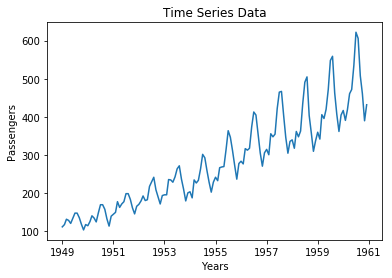

In [5]:
# Plot data for visualization
plt.plot(series);
plt.title("Time Series Data");
plt.xlabel("Years");
plt.ylabel("Passengers");

From inspecting the data, summary, and plot we can conclude that this time series has a positive linear trend, multiplicative seasonal patterns, and possibly some irregular patterns. This information strongly suggests for us to use a SARIMA model to do forecasting.

### Split data into training and testing sets

In [6]:
# percent_training variable divides the amount of data to be used for training
percent_training = 0.70
split_point = round(len(series) * percent_training)
training, testing = series[0:split_point], series[split_point:]

### Removing multiplicativity and trend

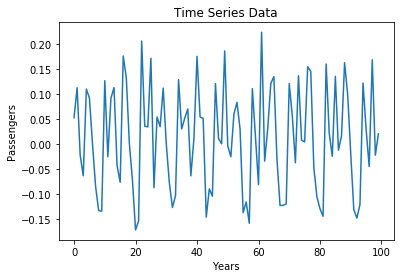

In [7]:
# Since this data is multiplicative we apply a log transform
training = np.log(training)

# Since we have positive linear trend we apply differencing of 1 period
training_diff = training.diff(periods=1).values[1:]

# We plot the residual log-differenced series
plt.plot(training_diff);
plt.title("Time Series Data");
plt.xlabel("Years");
plt.ylabel("Passengers");

We see here that there is no more a multiplicative affect and no more trend. However, an unstable seasonal pattern is still present in this residual series. It indicates that we need to remove the seasonal pattern which can be done with SARIMA. We can select the seasonal pattern parameters of SARIMA by looking at the ACF and PACF plots.

### Test stationarity

It is evident from the plot above that the residual series is not stationary due to the presence of seasonal patterns. However, as a tutorial on how to do robust stationarity testing, I provide code below for the Augmented Dickey-Fuller test.

In [8]:
# Perform Augmented Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Augmented Dickey-Fuller Test:')
dftest = adfuller(training_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

Results of Augmented Dickey-Fuller Test:
Test Statistic                 -2.734535
p-value                         0.068250
#Lags Used                     12.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64


Here we see that the p-value > -3.50 (the 1% critical value) which means we accept the null hypothesis where the data has has some time dependent structure and thus is non-stationary.

### ACF and PACF plot analysis

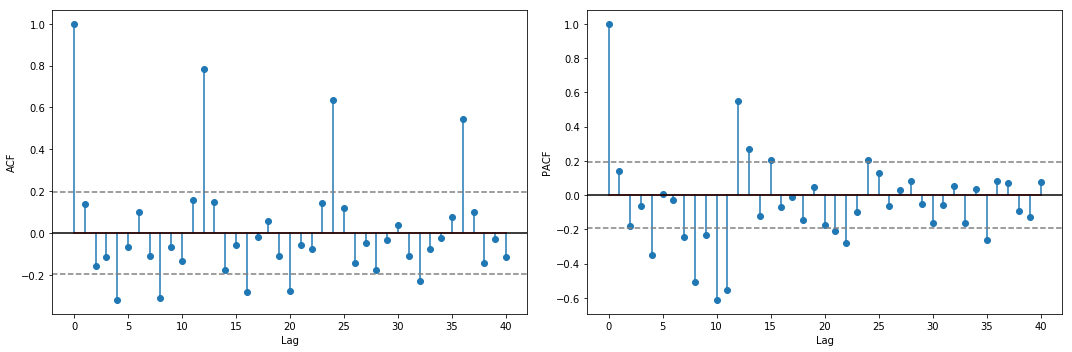

In [9]:
# import acf/pacf functions and run them with the differenced training data
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(training_diff, nlags=40)
lag_pacf = pacf(training_diff, nlags=40, method='ols')

# Plot ACF:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF');
plt.tight_layout()

### SARIMA model fit and  evaluation

Looking at the ACF and PACF plots of the differenced series we see our first significant value at lag 4 for ACF and at the same lag 4 for the PACF which suggest to use p = 4 and q = 4. We also have a big lag at 12 in the ACF plot which suggests our season is S = 12 and since this lag is positive it suggests P = 1 and Q = 0. Since this is a differenced series for SARIMA we set d = 1, and since the seasonal pattern is not stable over time we set D = 0. 

All together this gives us a SARIMA(4,1,4)(1,0,0)[12] model. Next we run SARIMA with these values for forecasting.

In [10]:
# note the input is training not training_diff, if you input training_diff then set d = 0
model = SARIMAX(training, order=(4,1,4), seasonal_order=(1,0,0,12),enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False) # extract the fitted model

---
**Note:**
The Python SARIMAX function has the inputs enforce_stationarity and enforce_invertibility, these are True by default. They enforce certain statistical properties of SARIMA, but by having them set to true most of the parameters you set for SARIMA will cause errors. I always set these to False which allows SARIMA to work with any parameters.

---

Now that we have a fitted model on our training data we visually inspect to see how good of a fit it is. Additionally, we subtract the fitted values to the training data to get our residual series (irregular component). Our goal is to fit a model so well that the residual series is noise. When it is noise it means we can't fit anything else better to it.

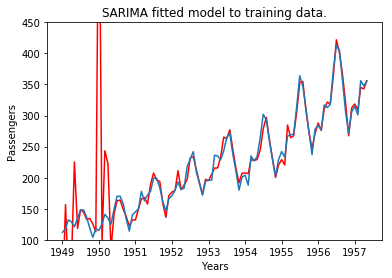

In [11]:
fitted_model = np.exp(model_fit.fittedvalues)
plt.plot(fitted_model,'r')
plt.plot(np.exp(training))
plt.ylim((100,450))
plt.title("SARIMA fitted model to training data.")
plt.xlabel("Years")
plt.ylabel("Passengers");

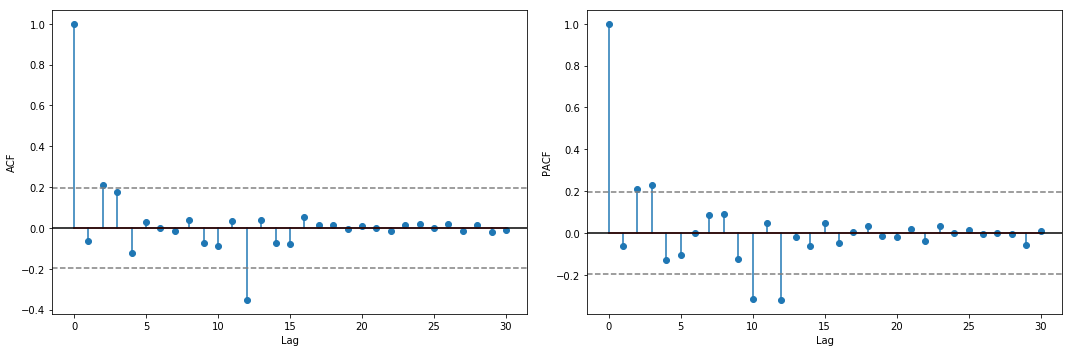

In [12]:
residual = training-model_fit.fittedvalues

lag_acf = acf(residual, nlags=30)
lag_pacf = pacf(residual, nlags=30, method='ols')

# Plot ACF:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF:
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF');
plt.tight_layout()

Looking at the fitted model on top of the training data we see it's not exactly a perfect fit. 

Looking at the ACF/PACF of the residual series we also see the residual is close to being noise but not 100% noise, we still have a few minor points extending outside the significance lines. 

For the most part, this is fine. We could go back and experiment with different SARIMA parameters until the fit looks perfect and the irregular component becomes 100% noise. But by doing this we also risk overfitting the model to the training so I'll keep the current parameters and move foward now to forecasting.

### SARIMA multistep forecasting

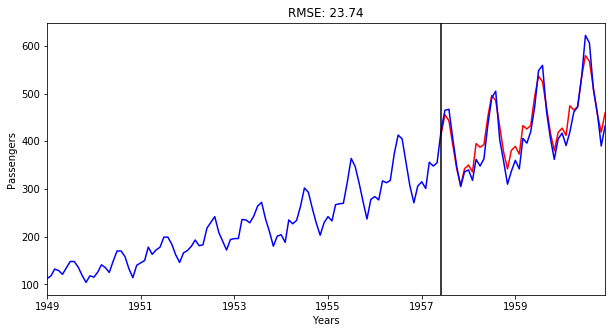

In [13]:
K = len(testing) # number of future time steps we want to forecast (ie multistep forecating)
forecast = model_fit.forecast(K) # apply the model to forecast out K time steps
forecast = np.exp(forecast) # transform forecast back to original non-log scale

# Plot forecast results and display RMSE
plt.figure(figsize=(10, 5))
plt.plot(forecast,'r');
plt.plot(series,'b');
plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.xlabel("Years");
plt.ylabel("Passengers");
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black'); # line to divide training/testing data

We can see here that the multi-step forecast of our SARIMA(4,1,4)(1,0,0)[12] model fits the testing data extremely well with an RMSE of 23.7! When you manually conduct a good time series analysis, as I have done here, it will be difficult to beat ARMA models for forecasting. 

### SARIMA multistep forecasting, with model selection by grid search

Running a grid search (I did this offline) with setting each parameter to take the value of 0 or 1 I get the following best results SARIMA(1, 0, 1)x(1, 1, 1)[12] which had an AIC of 696.05. Below I fit this model to my training data and forecast again.

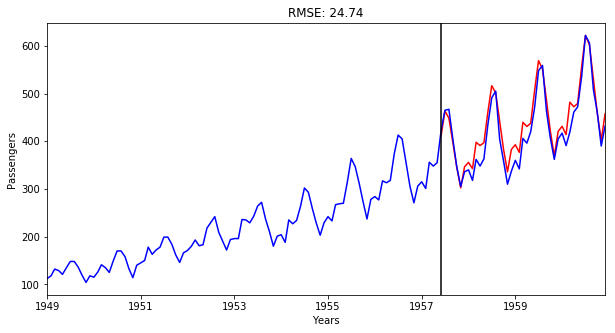

In [14]:
model = SARIMAX(training, order=(1,0,1), seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False) # extract the fitted model

K = len(testing) # number of future time steps we want to forecast (ie multistep forecating)
forecast = model_fit.forecast(K) # apply the model to forecast out K time steps
forecast = np.exp(forecast) # transform forecast back to original non-log scale

# Plot forecast results and display RMSE
plt.figure(figsize=(10, 5))
plt.plot(forecast,'r');
plt.plot(series,'b');
plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.xlabel("Years");
plt.ylabel("Passengers");
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black'); # line to divide training/testing data

The fit here is also very good with an RMSE of 24.74! It's not the best model (as with picking values manually) but it's so close that grid search is more commonly used in both academia and industry then manually picking values.